In [62]:
# Load All Possible Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [63]:
energy = pd.read_csv("energydata_complete.csv")
energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [64]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [65]:
energy.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [66]:
energy.shape

(19735, 29)

In [67]:
energy.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [68]:
energy.describe(include = "all")

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-01-11 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,NaN,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,NaN,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,NaN,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,NaN,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769


### Exploratory Data Analysis

In [69]:
energy.drop(columns = ["date"], axis = 1, inplace = True)

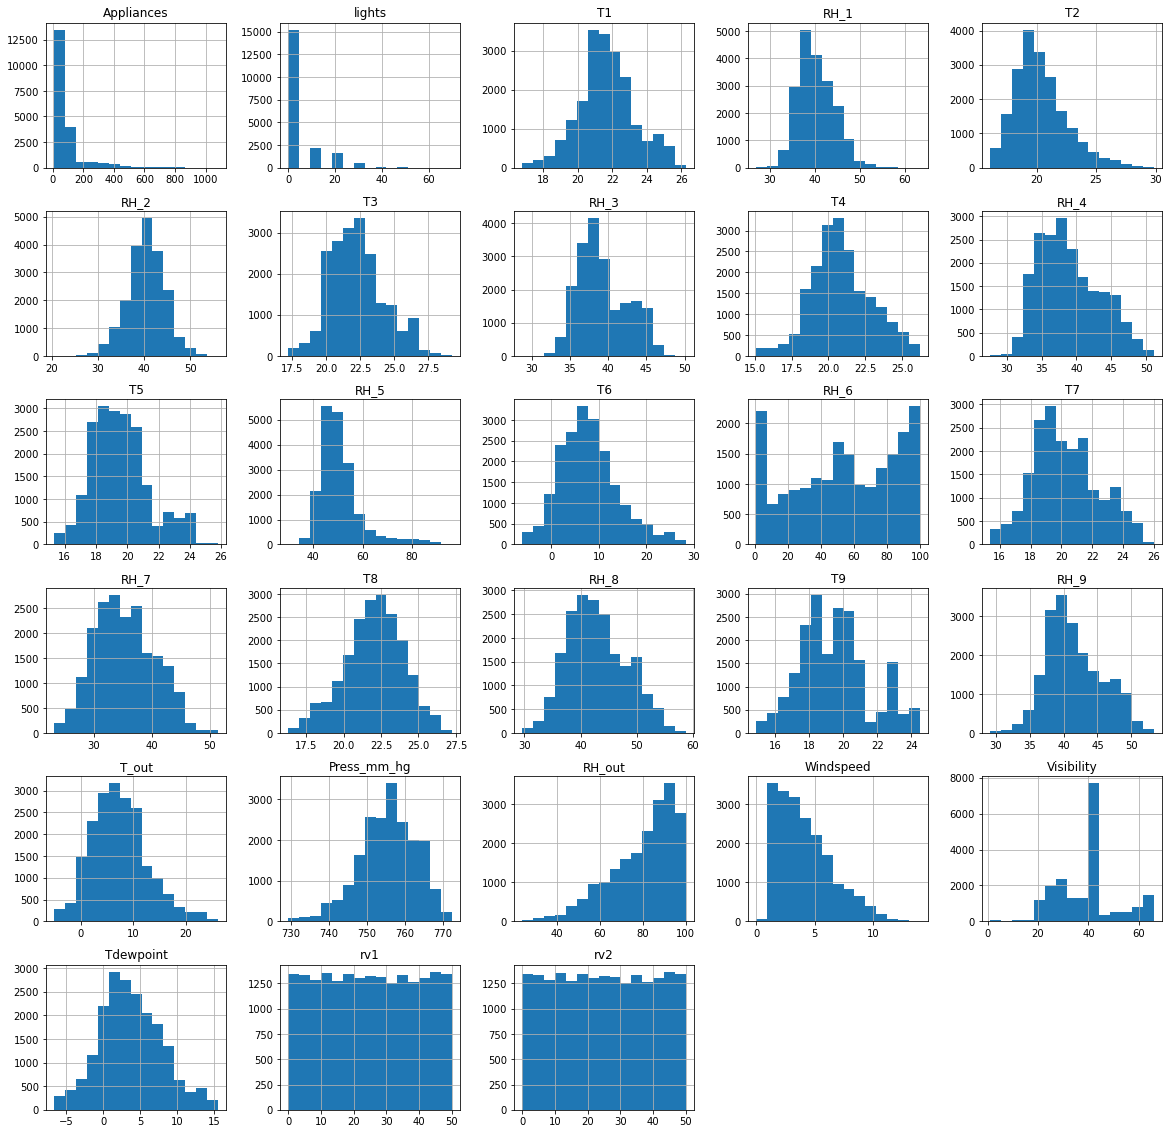

In [70]:
# Visualization of the histogram of all the features to understand the  distribution
energy.hist(bins=15, figsize=(20,20));

#### The following can be observed

All the readings from sensors inside the house are from a Normal distribution whereas RH_6 and RH_out which are the outside humidity sensors

Also all temperature readings follow a Normal distribution except for T9.

It can be noticed that Visibility, Windspeed and Appliances are skewed.

Lastly, the light histogram shows that the are more zero entries in the column, hence we can drop it.

In [71]:
energy.drop(columns = ["lights"], axis = 1, inplace = True)

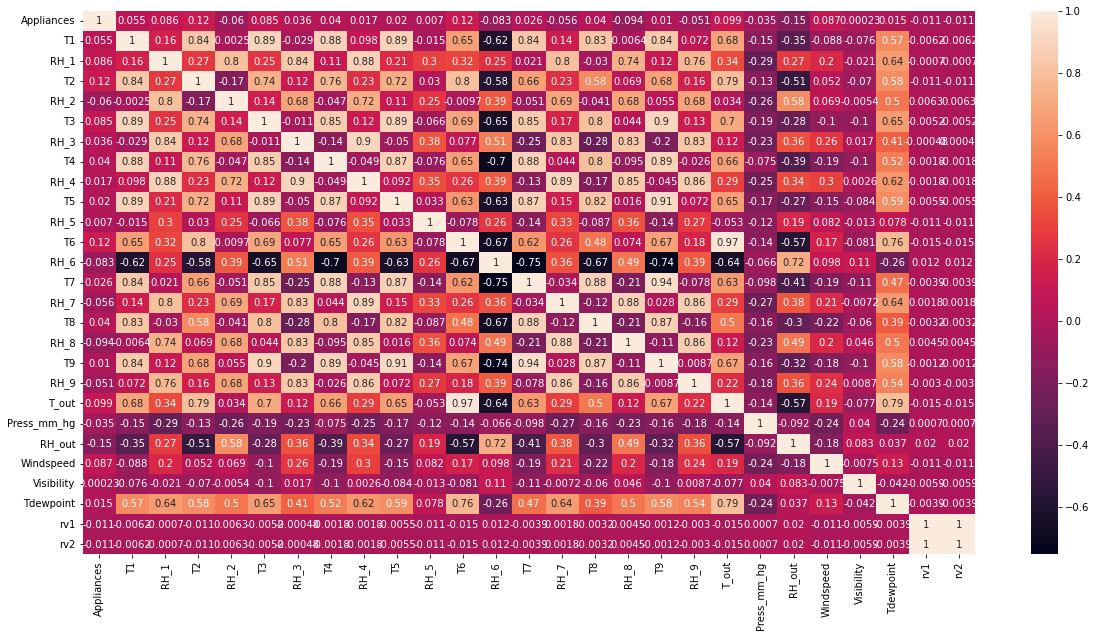

In [72]:
energy_corr = energy.corr()
plt.figure(figsize = (20,10))
sns.heatmap(energy_corr, annot = True);

#### Question
From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two D.P?

In [73]:
# Feature Selection for Linear Regression
X = energy[["T2"]]
y = energy["T6"]

In [74]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [75]:
# Build a Linear Regression Model
linear_model1 = LinearRegression()
linear_model1.fit(X_train, y_train)

LinearRegression()

In [76]:
y_pred = linear_model1.predict(X_test)
print(f"r squared is: {round(r2_score(y_test, y_pred), 2)}")

r squared is: 0.64


#### Question 13

In [77]:
# Normalize the dataset with MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(energy), columns=energy.columns)

# Feature Selection
X = normalised_df.drop(["Appliances"], axis=1)
y = normalised_df["Appliances"]

# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Model
linear_model2 = LinearRegression()
linear_model2.fit(X_train, y_train)

# Use the model to make predictions on the test dataset 
y_pred = linear_model2.predict(X_test)

# Print the mean_absolute_error
print(f"mean_absolute_error is: {round(mean_absolute_error(y_test, y_pred), 2)}")

mean_absolute_error is: 0.05


#### Question 14

In [78]:
print(f"residual sum of squares is : {round(np.sum(np.square(y_test - y_pred)), 2)}")

residual sum of squares is : 45.35


#### Question 15

In [79]:
print(f"Root mean square error: {round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)}")

Root mean square error: 0.088


#### Question 16

In [80]:
print(f"coefficient of determination (r squared) is: {round(r2_score(y_test, y_pred), 2)}")

coefficient of determination (r squared) is: 0.15


#### Question 17

In [81]:
## Compute a dataframe of weights
weights_df = pd.DataFrame(data={"weights":linear_model2.coef_}, index=X_train.columns)

## Print the lowest and highest weights
print(weights_df["weights"].idxmin(), ",", weights_df["weights"].idxmax())

RH_2 , RH_1


#### Question 18

In [82]:
## Train a Ridge Regressor model
ridge_model = Ridge(alpha=0.4)

## Fit the model
ridge_model.fit(X_train, y_train)

## Use the model to make predictions on the test dataset
y_pred = ridge_model.predict(X_test)

## Print the root_mean_squared_error
print(f"Root mean square error: {round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)}")

Root mean square error: 0.088


#### Question 19

In [83]:
## Train a Lass Regressor model
lasso_model = Lasso(alpha = 0.001)
lasso_model.fit(X_train, y_train)

## Compute a dataframe of weights
weights_df = pd.DataFrame(data={"weights":lasso_model.coef_}, index=X_train.columns)

np.sum(weights_df["weights"] != 0)

4

#### Question 20

In [84]:
y_pred = lasso_model.predict(X_test)
print(f"Root mean square error: {round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)}")

Root mean square error: 0.094
